<b><center>Chatura Samarasinghe <br> Support Vector Machine</center></b>

In [1]:
from sklearn.datasets import fetch_lfw_people
import numpy as np

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

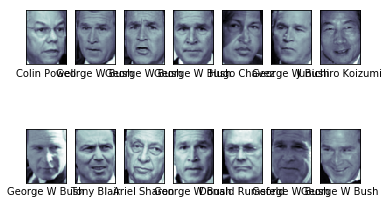

In [4]:
fig, ax = plt.subplots(2,7)
for i, axi in enumerate(ax.flat):
                axi.imshow(faces.images[i], cmap='bone')
                axi.set(xticks=[], yticks=[],
                        xlabel=faces.target_names[faces.target[i]])

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [7]:
pca = PCA(n_components=150, whiten=True)
svc = SVC (kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [8]:
# testing and training split
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                            random_state=42)


/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
model.fit(Xtrain,ytrain)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [10]:
yfit = model.predict(Xtest)

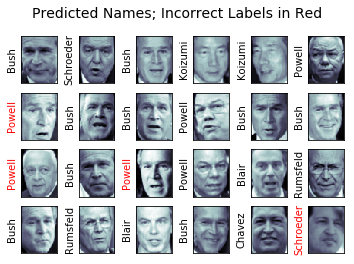

In [11]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
                axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
                axi.set(xticks=[], yticks=[])
                axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                               color='black' if yfit[i] == ytest[i] else 'red') 
                fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [12]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.80      0.86        15
     Colin Powell       0.66      0.97      0.79        68
  Donald Rumsfeld       0.86      0.77      0.81        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.77      0.74      0.76        23
      Hugo Chavez       1.00      0.60      0.75        20
Junichiro Koizumi       1.00      0.67      0.80        12
       Tony Blair       0.85      0.81      0.83        42

      avg / total       0.85      0.82      0.83       337



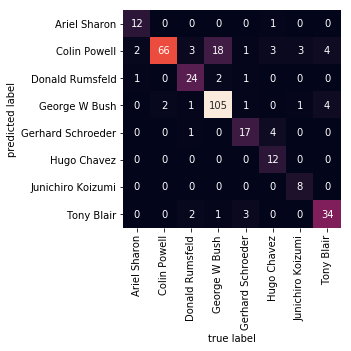

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                        xticklabels=faces.target_names,
                        yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');